In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('cces_example_data.csv')

One visual that I would like to learn how to create (I don't think this was discussed in class because it isn't in the notes from GitHub):
* Overlapping densities

Kind of data that is relevant to my career goals that I would like to represent using overlapping densities:
* I would like to use overlapping densities to represent strength of intuitions over time.

In [3]:
df.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [4]:
df.columns

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid'],
      dtype='object')

In [5]:
len(df.index)

659

<function matplotlib.pyplot.show(close=None, block=None)>

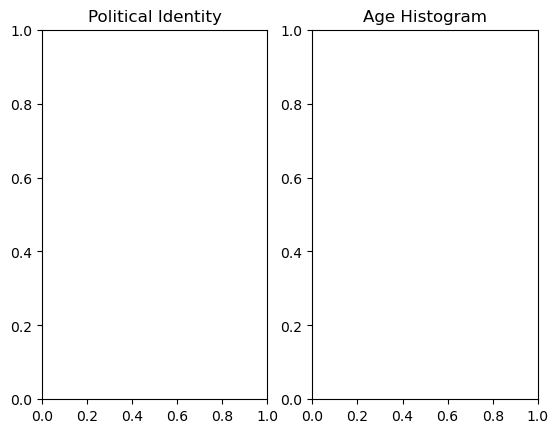

In [6]:
fig1, axs1 = plt.subplots(1, 2)
axs1[1].set_title('Age Histogram')
axs1[0].set_title('Political Identity')
plt.show

In [7]:
df['Evaluation'].describe()

count    659.000000
mean       0.886191
std        1.056507
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        3.000000
Name: Evaluation, dtype: float64

In [8]:
e_counts = df.groupby('Evaluation').count()['caseid']
e_counts

Evaluation
0    365
1     48
2    202
3     44
Name: caseid, dtype: int64

In [9]:
e_counts.index

Index([0, 1, 2, 3], dtype='int64', name='Evaluation')

In [10]:
e_counts.values

array([365,  48, 202,  44])

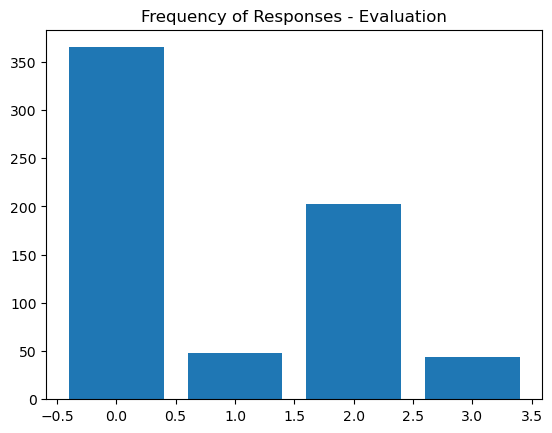

In [11]:
fig2, ax2 = plt.subplots()
ax2.bar(x = e_counts.index, height = e_counts.values)
ax2.set_title('Frequency of Responses - Evaluation')
plt.show()

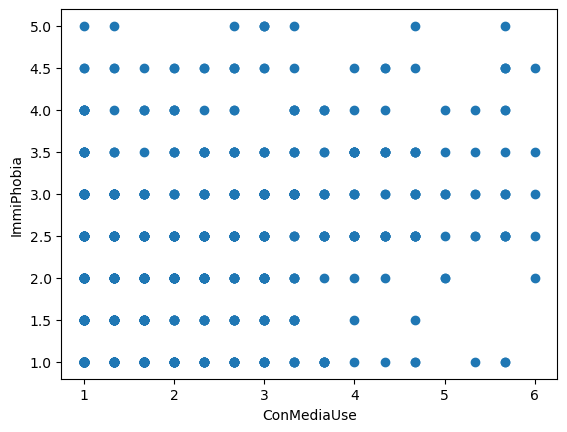

In [12]:
fig3, ax3 = plt.subplots()
ax3.scatter(df['ConMediaUse'], df['ImmiPhobia'])
ax3.set_xlabel('ConMediaUse')
ax3.set_ylabel('ImmiPhobia')
plt.show()

In [13]:
df.groupby('ConMediaUse').describe()['ImmiPhobia']

,count,mean,std,min,25%,50%,75%,max
ConMediaUse,,,,,,,,
1.000000,138.0,2.047101,1.021463,1.0,1.000,2.0,3.000,5.0
1.333333,79.0,2.063291,0.958655,1.0,1.250,2.0,2.750,5.0
1.666667,79.0,1.848101,0.871024,1.0,1.000,1.5,2.500,4.5
2.000000,55.0,2.263636,0.985330,1.0,1.500,2.0,2.750,4.5
2.333333,49.0,2.346939,0.936550,1.0,1.500,2.5,3.000,4.5
2.666667,50.0,2.500000,1.069045,1.0,1.500,2.5,3.000,5.0
3.000000,52.0,2.548077,1.072196,1.0,1.875,2.5,3.000,5.0
3.333333,38.0,2.697368,1.036753,1.0,2.000,3.0,3.375,5.0
3.666667,23.0,2.478261,1.038774,1.0,1.500,2.5,3.000,4.0


The 'ConMediaUse' and 'ImmiPhobia' scatterplot is not an effective data visualization because of the number of overlapping points in the large dataset (Wilke, ch. 18). According to Wilke (ch. 18), a simple way to solve this problem is through transparency (ex. fig4). If setting the alpha of each data point to less than 1.0, then points will appear darker when they are plotted more frequently. Wilke (ch. 18) also discusses jittering, which is randomly moving the data points a small amount in a random x or y direction to make the difference in transparency more apparent.

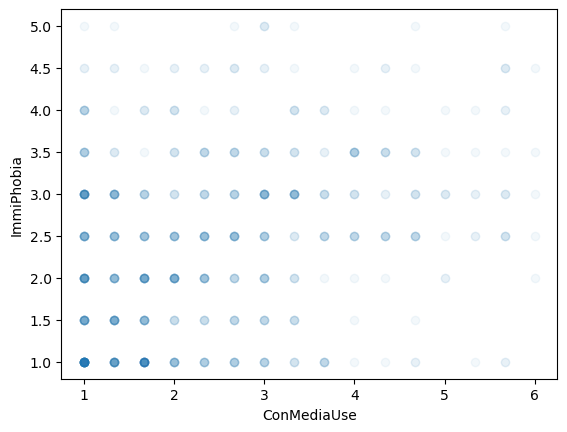

In [14]:
fig4, ax4 = plt.subplots()
ax4.scatter(df['ConMediaUse'], df['ImmiPhobia'], alpha=0.05)
ax4.set_xlabel('ConMediaUse')
ax4.set_ylabel('ImmiPhobia')
plt.show()